In [219]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [220]:
df_meto_trans = pd.read_csv('meto transfer.csv')
df_wear_trans = pd.read_csv('wear transfer.csv')

## --------------------------------------------------------------------------------------------------------------------------------------

In [221]:
def network(df, address, method):
    
    if method.lower() == 'claim':
        to = df.loc[(df['From'] == address) & ((df['Method'].str.contains('Claim')) | (df['Method'].str.contains('Withdraw')))]['To'].values.tolist()
        quantity = df.loc[(df['From'] == address) & ((df['Method'].str.contains('Claim')) | (df['Method'].str.contains('Withdraw')))]['Quantity'].values.tolist()
    
    elif method.lower() == 'swap':
        to = df.loc[(df['From'] == address) & (df['Method'].str.contains('Swap'))]['To'].values.tolist()
        quantity = df.loc[(df['From'] == address) & (df['Method'].str.contains('Swap'))]['Quantity'].values.tolist()
        
    elif method.lower() == 'stake':
        to = df.loc[(df['From'] == address) & (df['Method'].str.contains('Stake'))]['To'].values.tolist()
        quantity = df.loc[(df['From'] == address) & (df['Method'].str.contains('Stake'))]['Quantity'].values.tolist()
        
    elif method.lower() == 'transfer':
        to = df.loc[(df['From'] == address) & (df['Method'].str.startswith('Transfer'))]['To'].values.tolist()
        quantity = df.loc[(df['From'] == address) & (df['Method'].str.startswith('Transfer'))]['Quantity'].values.tolist()
        
    elif method.lower() == 'disperse':
        to = df.loc[((df['From'] == address) & (df['Method'] == 'Disperse Token'))]['To'].values.tolist()
        quantity = df.loc[((df['From'] == address) & (df['Method'] == 'Disperse Token'))]['Quantity'].values.tolist()
    
    elif method.lower() == 'all':
        to = df.loc[df['From'] == address]['To'].values.tolist()
        quantity = df.loc[df['From'] == address]['Quantity'].values.tolist()
        
        
    zipped_to_quantity = zip(to, quantity)
    
    fig = plt.figure(figsize=(12,12))
    ax = plt.subplot(111)
    ax.set_title('Network Graph of transactions by {} Method'.format(method.capitalize()), fontsize=20, color = 'b')
    DG = nx.DiGraph()
    edges = []

    labels = {}
    
    print(f'\nAdress : {address}\nTo : \n')
    num = 0
    a = 0
    
    for x,y in zipped_to_quantity:
        edges.append((address, x))
        print(x)
        a += 1
    
    print(f'\nNumber of acceptors : {a}')
    print()   
    
    DG.add_edges_from(edges)
    nx.draw(DG, with_labels = True, node_size = 500, node_color='orange')
    pos = nx.spring_layout(DG)
    
    zipped_to_quantity = zip(to, quantity)
    
    for x,y in zipped_to_quantity:
        labels[(address,x)] = y
    
      
    nx.draw_networkx_edge_labels(DG, pos, labels, font_size=8)
    
    plt.tight_layout()
    plt.savefig('Network transaction by given method',loc = 'right center' ,dpi=60, facecolor='w', orientation='portrait', 
                papertype='ledger', transparent=False, pad_inches=0.5, frameon=True)
    plt.show()

In [222]:
df_meto_trans.From.sample(5)

1555    0x1f957078af1cdbeba283395d24432e034f1db7a3
1205    0x6d913b377472d5f807dec138cddf7f3a32b4408f
1526    0xdbda95a3c3262d81a1a2cd47c1ec30072d688f0c
935     0x7777cb84229a321f1d1ed9355729d4b5e11142af
872     0x23fd979f7a8be5d9e92a45c39c3cd7d7bf00c3fb
Name: From, dtype: object


Adress : 0x47fe9f54db5bdd1a4bae2255b8ec1977e82123b1
To : 

0xb743118e2450f5d1a0baa9d1ddcb56dbfd712f96
0x57790734e208d8d50d624c474988853ae10dc069
0x9633f76b9f39ff917c1144908180bd4ca5930bc5
0x821910fa3c1839bbfc3b430a487d4e3e134b05ea
0xcec0f9052fe84201f9754f0a30281dec1e858cfe
0x587bbeedb0490fc6f33a6fdf53eefdfdf6fda9af
0xbae59f3dd798545a71487e9e0fad6e96f66199d8
0x3adecce2f7a223f745ea762cebca46d5d3806c84
0x36e3aa984cd445cefc7d5a3c77b574ff0296c8c8
0xe6420ffb24567a515ec9a86fb4d4062b71b0bf69
0x7f2022daa9a6874f1be3bccc17bea1fd2a3ee1f9
0xace3681ccd267243f40f54c89eba3c323e5169a6
0xb536ec6752f97c66ebe97d47e81325da4f562e0d
0x1514528aa38cfd359d5376a3272ed95ca2c3ce00
0xde97f2fad748338e2c91b0349d438b8d1407e0a1
0xf86687774af678986f803409f2502c315292e751
0xcb51997cca1d0a64e647eb5c5ca489757bf02566
0xf4d401922daeaed2a3d3f624dd14064a9e92b02d
0xdf9b300dedaef063482f4d1a4b62b138cbef6bcf
0xa8b43f077af3bc9e81399547c2c42dcc08713245
0x5f0a6b8c13c49641a2866af4ef509870eb5fd013
0xc927e121c29037136adab44539c95d92294

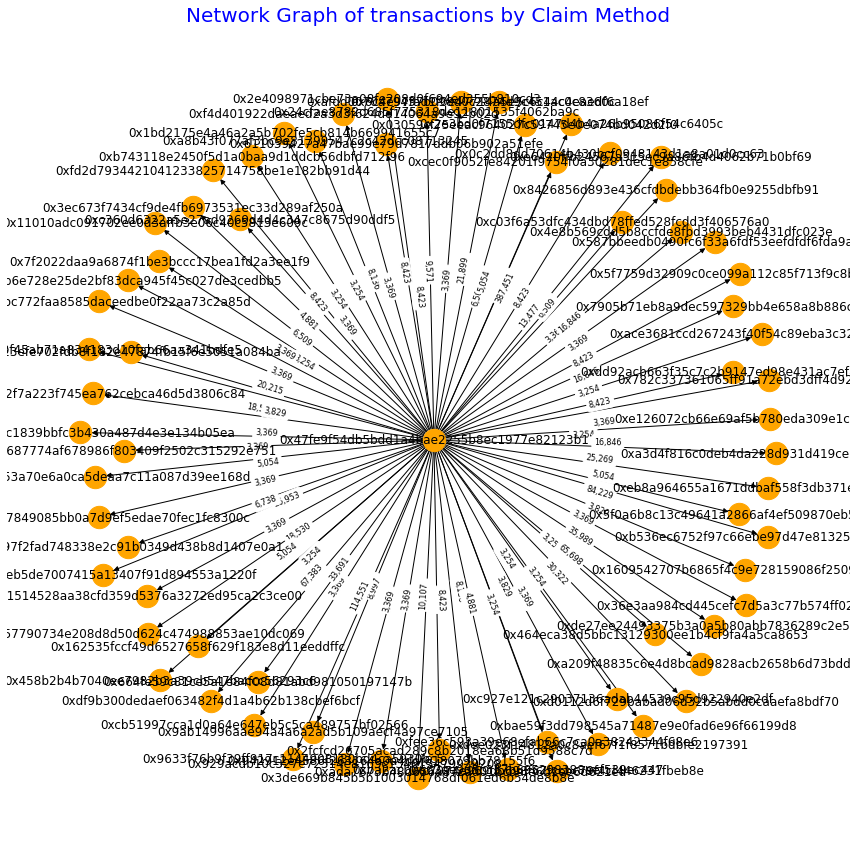

In [269]:
network(df_meto_trans, '0x47fe9f54db5bdd1a4bae2255b8ec1977e82123b1', 'Claim')